<a href="https://colab.research.google.com/github/dinnur08/Spam-Mail-Classification/blob/main/ML_PBL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("SMSSpamCollection", sep='\t', header=None, names=['label', 'message'])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Next, we need to first understand the data before building a model.

We'll first need to see how many messages are considered spam or ham

In [ ]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

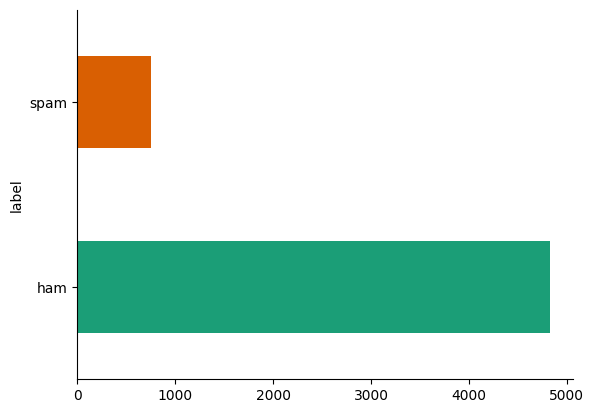

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

From the cell above, we see that 4825 messages are valid messages, and only 747 messages are labled as spam.

Lets now just view some messages that are ham and some that are spam

In [ ]:
spam = df[df["label"] == "spam"]
spam.head()

,label,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [ ]:
ham = df[df["label"] == "ham"]
ham.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...


after looking at some messages that spam and ham, we can see the spam messages look spammy..

# Preprocessing

The next step is to get the dataset ready to build a model. A machine learning model can only deal with numbers, so we'll have to convert our text into numbers using TfidfVectorizer
TfidfVectorizer converts a collection of raw documents to a matrix of term frequency-inverse document frequency features. Also known as TF-IDF.

In our case, a document is each message. For each message, we'll compute the number of times a term is in our document divied by all the terms in the document times the total number of documents divded by the number of documents that contain the specific term

first, we'll split the dataset into a train and test set. For the training set, we'll take 80% of the data from the dataset, and use that for training the model. The rest of the dataset(20%) will be used for testing the model.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size = 0.2, random_state = 1)

once we split our data, we can use the TfidfVectorizer. This will return a sparse matrix(a matrix with mostly 0's)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

Next, we'll train a model using Gaussian Naive Bayes in scikit-learn. Its a good starting algorithm for text classification. We'll then print out the accuracy of the model by using the training set and our confusion_matrix

# **Model Training**

To train our model, we'll use A Navie Bayes algorithm to train our model

The formula for Navie Bayes is:
P(S|W)=[P(W|S)×P(S)]/[P(W|S)×P(S)+P(W|H)×P(h) ]
.

P(s|w) - The probability(P) of a message is spam(s) Given(|) a word(w)

=

P(w|s) - probability(P) that a word(w) is spam(s)

*

P(s) - Overall probability(P) that ANY message is spam(s)

/

P(w|s) - probability(P) that a word(w) exists in spam messages(s)

*

P(s) - Overall probability(P) that ANY message is spam(s)

+

P(w|h) - probability(P) the word(w) appears in non-spam(h) messages

*

P(h) - Overall probability(P) that any message is not-spam(h)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = GaussianNB()
clf.fit(X_train.toarray(),y_train)

GaussianNB()

In [ ]:
y_true, y_pred = y_test, clf.predict(X_test.toarray())
accuracy_score(y_true, y_pred)

0.8986547085201794

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         ham       0.99      0.89      0.94       968
        spam       0.57      0.93      0.71       147

    accuracy                           0.90      1115
   macro avg       0.78      0.91      0.82      1115
weighted avg       0.93      0.90      0.91      1115



In [ ]:
cmtx = pd.DataFrame(
    confusion_matrix(y_true, y_pred, labels=['ham', 'spam']),
    index=['ham', 'spam'],
    columns=['ham', 'spam']
)
print(cmtx)

      ham  spam
ham   866   102
spam   11   136


# **Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {"var_smoothing":[1e-9, 1e-5, 1e-1]}
gs_clf = GridSearchCV(
        GaussianNB(), parameters)
gs_clf.fit(X_train.toarray(),y_train)

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-05, 0.1]})

In [ ]:
gs_clf.best_params_

{'var_smoothing': 0.1}

In [ ]:
y_true, y_pred = y_test, gs_clf.predict(X_test.toarray())
accuracy_score(y_true, y_pred)

0.9650224215246637

In [ ]:
cmtx = pd.DataFrame(
    confusion_matrix(y_true, y_pred, labels=['ham', 'spam']),
    index=['ham', 'spam'],
    columns=['ham', 'spam']
)
print(cmtx)

      ham  spam
ham   932    36
spam    3   144


In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98       968
        spam       0.80      0.98      0.88       147

    accuracy                           0.97      1115
   macro avg       0.90      0.97      0.93      1115
weighted avg       0.97      0.97      0.97      1115



From our trained model, we get about 96% accuracy. Which is pretty good.

We also print out the confusion_matrix. This shows how many messages were classificed correctly. In the first column and first row, we see that 866 messages that were classified as ham were actaully ham and 136 messages that were predicted as spam, were in fact spam.

Next, lets test our model with some examples messages

## Inference

In [ ]:
message = vectorizer.transform(["i'm on my way home"])
message = message.toarray()
gs_clf.predict(message)

array(['ham'], dtype='<U4')

In [ ]:
message = vectorizer.transform(["this offer is to good to be true"])
message = message.toarray()
gs_clf.predict(message)

array(['spam'], dtype='<U4')

The final step is the save the model and the tf-idf vectorizer. We will use these when clasifing incoming messages on our lambda function

In [ ]:
import joblib
joblib.dump(gs_clf, "model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")